In [1]:
import numpy as np
import pandas as pd
import optmodels
from scipy.stats import random_correlation
import matplotlib.pyplot as plt

In [2]:
# specify eigenvalues

num_fake_stocks = 10
# eig_v = np.random.rand(num_fake_stocks)
eig_v = np.random.uniform(0.5, 1, num_fake_stocks)
eig_v[-1] = eig_v.shape[0] - np.sum(eig_v[:-1])

np.random.seed(666)
mean_true = np.random.uniform(0, 0.15, num_fake_stocks)
std_true = np.random.uniform(0.15, 0.5, num_fake_stocks).reshape(-1, 1)
corr_true = random_correlation.rvs(eig_v)
cov_true = np.outer(std_true, std_true) * corr_true

benchmark_weight_fake = np.ones(num_fake_stocks) / num_fake_stocks
maximum_deviation_fake = 1



In [3]:
path = "./output/data.xlsx"
price_table = pd.read_excel(path, sheet_name="stock_close", index_col="Date")
ret_table = pd.read_excel(path, sheet_name="stock_ret", index_col="Date")
cov_table = pd.read_excel(path, sheet_name="stock_cov", index_col=0)
corr_table = pd.read_excel(path, sheet_name="stock_corr", index_col=0)
sigma = np.sqrt(np.diag(cov_table))
num_stocks = price_table.shape[1]
benchmark_weight = np.ones(num_stocks) / num_stocks
maximum_deviation = 1



In [4]:
# fake data

# MiniVar
MiniVar_weight_fake = optmodels.MiniVar(
    cov_true, num_fake_stocks, benchmark_weight_fake, maximum_deviation_fake
)

# RiskParity
RiskParity_weight_fake = optmodels.RiskParity(
    cov_true, num_fake_stocks, benchmark_weight_fake, maximum_deviation_fake
)

# MaxDiverse
MaxDiverse_weight_fake = optmodels.MaxDiverse(
    cov_true, num_fake_stocks, benchmark_weight_fake, maximum_deviation_fake
)

print("fake data results:")
print("MiniVar")
print(MiniVar_weight_fake)
print()
print("RiskParity")
print(RiskParity_weight_fake)
print()
print("MaxDiverse")
print(MaxDiverse_weight_fake)



Using license file /Users/xingzhangzhu/gurobi.lic
Academic license - for non-commercial use only
True
True
fake data results:
MiniVar
[0.11191347 0.0607321  0.15522276 0.04514426 0.07118833 0.02594809
 0.19523254 0.15649127 0.1167138  0.06141338]

RiskParity
[0.10599629 0.07629927 0.13491592 0.07025656 0.08903061 0.0544431
 0.13699012 0.13635193 0.1102886  0.08542759]

MaxDiverse
[0.11173707 0.08254582 0.14146214 0.07282779 0.08999522 0.05709831
 0.13057185 0.13519607 0.10171194 0.07685378]


In [5]:
# actual data

# MiniVar
MiniVar_weight = optmodels.MiniVar(
    cov_table, num_stocks, benchmark_weight, maximum_deviation
)

# RiskParity
RiskParity_weight = optmodels.RiskParity(
    cov_table, num_stocks, benchmark_weight, maximum_deviation
)

# MaxDiverse
MaxDiverse_weight = optmodels.MaxDiverse(
    cov_table, num_stocks, benchmark_weight, maximum_deviation
)

# HRP
HRP_weight = optmodels.HRP(price_table)

True
True


In [6]:
print()
print("actual data results:")
print("MiniVar")
print(MiniVar_weight)
print()
print("RiskParity")
print(RiskParity_weight)
print()
print("MaxDiverse")
print(MaxDiverse_weight)
print()
print("HRP")
print(HRP_weight)



actual data results:
MiniVar
[8.45759534e-07 3.55628407e-02 9.37840816e-06 7.10292380e-05
 5.71863137e-03 4.27222038e-07 2.59336331e-02 4.11030976e-04
 7.33315193e-05 6.63195298e-06 1.19952749e-06 2.46817003e-06
 7.26341972e-07 7.85912920e-06 1.61224255e-01 1.75370928e-06
 2.58836059e-06 1.46202846e-01 4.81192940e-03 3.58918314e-07
 8.09636268e-06 2.00490455e-06 6.64371061e-06 4.10732940e-02
 1.43133026e-03 2.98925277e-01 8.59398775e-02 3.14581966e-02
 3.78543228e-02 1.23257193e-01]

RiskParity
[0.02088012 0.03113189 0.01630706 0.03951399 0.02700405 0.01929877
 0.03209645 0.0348438  0.03167443 0.02673488 0.02427465 0.025583
 0.02603393 0.02837486 0.05044127 0.02490512 0.0259899  0.05485436
 0.04075695 0.01910917 0.02981706 0.01967413 0.0288012  0.03974464
 0.02853663 0.06644917 0.04799801 0.03366673 0.05058731 0.05491648]

MaxDiverse
[5.24198258e-02 3.59448914e-02 4.15184356e-02 1.13491006e-17
 7.71467213e-02 1.87793978e-17 9.86848194e-02 1.95189577e-02
 6.94491006e-18 5.62652720e-02 

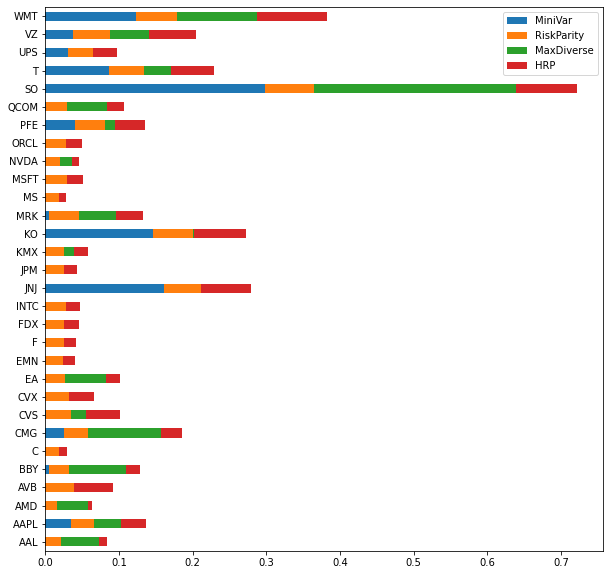

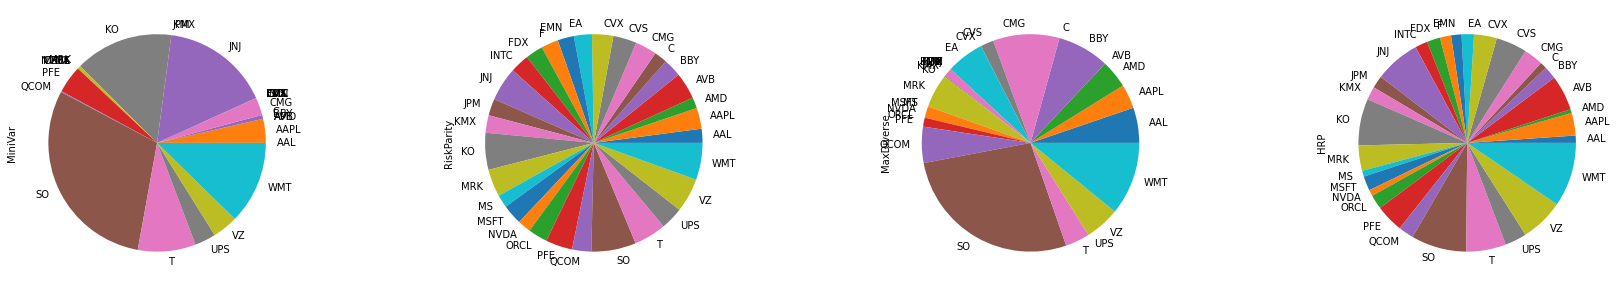

In [7]:
result = pd.DataFrame(
    [MiniVar_weight, RiskParity_weight, MaxDiverse_weight],
    columns=price_table.columns,
    index=["MiniVar", "RiskParity", "MaxDiverse"],
).T

result["HRP"] = HRP_weight
result.plot.barh(stacked=True, figsize=(10, 10))
plt.show()

result.plot.pie(subplots=True, figsize=(30, 5), legend=False)
plt.show()
